In [429]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm


In [430]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [431]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))
files

['\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_objective_score_simulation_100\\MatchResult_method_mcts_player_0_objective_score_simulation_100_5ee0e6f8-3ec1-4e40-938f-c4d002583b1d.csv',
 '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_objective_score_simulation_200\\MatchResult_method_mcts_player_0_objective_score_simulation_200_e8591021-89c0-491e-8277-11398ce9a25b.csv',
 '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_objective_score_simulation_400\\MatchResult_method_mcts_player_0_objective_score_simulation_400_03712e26-74d4-4747-b012-d7df4492a538.csv',
 '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_objective_score_simulation_800\\MatchResult_method_mcts_player_0_objective_score_simulation_800_e6b83c3a-87bb-4e5d-a3bf-9b840fb296df.csv',
 '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_simpleEffect_1_objective_score_simulation_100\\Ma

In [432]:
StatisticsColumns = ['Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [433]:
def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        result[data[i]] = data[i+1]
    return result

In [434]:
dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df


100%|██████████| 10/10 [00:00<00:00, 66.27it/s]


,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanComparisonCount,StdComparisonCount,Matched_HorizontalPiece,Matched_VerticalPiece,...,Target_CrossPiece,Target_RocketPiece,Target_BombPiece,Target_RainbowPiece,method,player,objective,simulation,simpleEffect,Sum_Matched
0,1,300,2023-05-15 06:24:15.159,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,81,5.713333,11.69646,48,50,...,0,2,2,3,mcts,0,score,100,0,288
1,2,301,2023-05-15 06:24:47.997,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,93,6.883721,14.64023,69,27,...,0,2,2,3,mcts,0,score,100,0,414
2,3,300,2023-05-15 06:25:16.790,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,84,5.750000,12.17930,60,31,...,0,2,2,3,mcts,0,score,100,0,360
3,4,301,2023-05-15 06:25:46.574,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,84,5.890366,11.93669,52,30,...,0,2,2,3,mcts,0,score,100,0,312
4,5,300,2023-05-15 06:26:18.098,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,95,6.923333,13.54557,48,37,...,0,2,2,3,mcts,0,score,100,0,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,301,2023-05-15 09:51:28.954,cfa9bc51-725b-4737-803b-7cbb82d81677,0,0,0.000000,0.00000,35,32,...,0,2,2,3,random,0,NaN,0,1,210
996,997,301,2023-05-15 09:51:40.179,cfa9bc51-725b-4737-803b-7cbb82d81677,0,0,0.000000,0.00000,44,39,...,0,2,2,3,random,0,NaN,0,1,264
997,998,300,2023-05-15 09:51:51.916,cfa9bc51-725b-4737-803b-7cbb82d81677,0,0,0.000000,0.00000,67,32,...,0,2,2,3,random,0,NaN,0,1,402
998,999,302,2023-05-15 09:52:03.693,cfa9bc51-725b-4737-803b-7cbb82d81677,0,0,0.000000,0.00000,53,18,...,0,2,2,3,random,0,NaN,0,1,318


In [435]:
match_result = original_df.groupby(['method', 'simpleEffect', 'simulation'])['Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      'Sum_Matched'].agg(
    {
        'Matched_HorizontalPiece':['mean', 'count'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Matched_HorizontalPiece        \
                                                  mean count   
method simpleEffect simulation                                 
mcts   0            100                      53.971000  1000   
                    200                      54.271000  1000   
                    400                      54.014000  1000   
                    800                      54.573000  1000   
       1            100                      48.469697   132   
                    200                      52.103448    58   
                    400                      54.666667    57   
                    800                      52.125000    24   
random 0            0                        46.377000  1000   
       1            0                        45.485000  1000   

                               Matched_VerticalPiece Matched_CrossPiece  \
                                                mean               mean   
method simpleEffect simulation                                            
mcts   0            100                    36.405000           6.969000   
                    200                    36.211000           7.205000   
                    400                    36.051000           7.007000   
                    800                    36.508000           7.212000   
       1            100                    32.045455           6.401515   
                    200                    32.413793           6.586207   
                    400                    34.771930           7.280702   
                    800                    33.708333           6.833333   
random 0            0                      33.185000           6.253000   
       1            0                      31.923000           6.028000   

                               Matched_RocketPiece Matched_BombPiece  \
                                              mean              mean   
method simpleEffect simulation                                         
mcts   0            100                  92.844000          7.164000   
                    200                  94.277000          7.410000   
                    400                  92.221000          7.373000   
                    800                  93.715000          7.488000   
       1            100                  84.477273          6.590909   
                    200                  92.206897          6.396552   
                    400                  93.666667          6.421053   
                    800                  88.041667          6.375000   
random 0            0                    83.249000          6.129000   
       1            0                    83.334000          5.790000   

                               Matched_RainbowPiece Sum_Matched  
                                               mean        mean  
method simpleEffect simulation                                   
mcts   0            100                    9.738000  323.826000  
                    200                    9.301000  325.626000  
                    400                    9.834000  324.084000  
                    800                    9.976000  327.438000  
       1            100                    8.204545  290.818182  
                    200                    9.448276  312.620690  
                    400                    9.508772  328.000000  
                    800                    9.958333  312.750000  
random 0            0                      8.246000  278.262000  
       1            0                      7.818000  272.910000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'b0'),
  Text(1, 0, 'b1'),
  Text(2, 0, 'b2'),
  Text(3, 0, 'b3'),
  Text(4, 0, 'b4'),
  Text(5, 0, 'b5')])

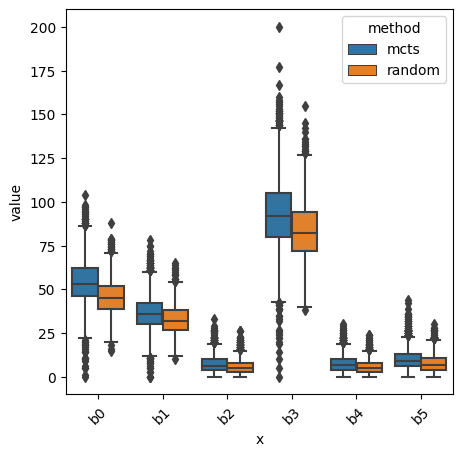

In [436]:
melted_df = original_df.copy()
melted_df = melted_df[melted_df['simulation'] == 1]

plt.figure(figsize=(5, 5))
melted_df = pd.melt(original_df, id_vars=['EpisodeCount', 'method', 'simulation', 'simpleEffect'], value_vars=[*StatisticsColumns], ignore_index=False)
# melted_df['x'] = 'sf' + melted_df['simpleEffect'].astype(str) + '_' + melted_df['variable']
melted_df['x'] = melted_df['variable']
melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')
melted_df

ax = sns.boxplot(x="x", y="value", hue="method", data=melted_df)
plt.xticks(rotation=45)